Epoch: 100%|██████████| 100/100 [00:01<00:00, 97.05it/s]


<Axes: >

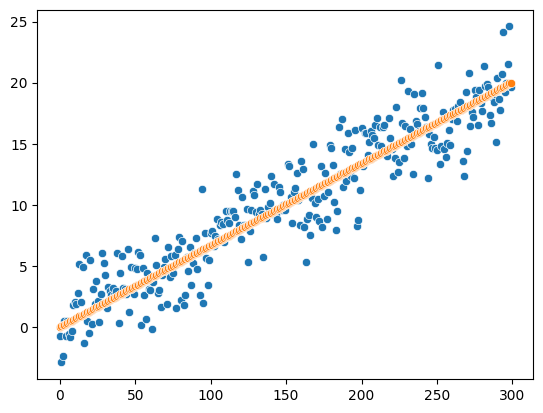

In [17]:
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from tqdm import tqdm
import time

for i in tqdm(range(100),desc="Epoch"):
    time.sleep(0.01)
X=np.linspace(start=0,stop=20,num=300)
Y=X.copy()
Y=Y + np.sin(Y) + np.random.normal(0,2,size=Y.shape[0])
sns.scatterplot(Y)
sns.scatterplot(X)

In [ ]:
class Simple1DRegressionDataSet(Dataset):
    def __init__(self,X,y):
        super().__init__()
        self.X=X.reshape(-1,1)
        self.y=y.reshape(-1,1)
    def __len__(self):
        self.X.shape[0]
    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32),torch.tensor(self.Y[index,:],dtype=torch.float32)
dt= Simple1DRegressionDataSet(X,Y)            
training_loader=DataLoader(dt,shuffle=True,batch_size=2)    
for i, (inputs,labels) in enumerate(training_loader):
    print(inputs) 
    print(labels)


TypeError: 'NoneType' object cannot be interpreted as an integer

In [ ]:
model=nn.Linear(1,1)
loss_func=nn.MSELoss()
nEpochs=30

for epoch in tqdm(range(nEpochs),desc="Train Batch"):
    model.train()
